# 加载数据集

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
import os, shutil

In [6]:
# 数据集路径
base_dir = r'C:\users\Administrator\Downloads\cats_and_dogs_small'


# 训练、验证、测试集
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# 训练集路径
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')


# 验证集路径
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# 测试集路径
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [21]:
print('训练集猫图片数:', len(os.listdir(train_cats_dir)))

训练集猫图片数: 1000


In [28]:
print('训练集狗图片数:', len(os.listdir(train_dogs_dir)))

训练集狗图片数: 1000


In [29]:
print('验证集猫图片数:', len(os.listdir(validation_cats_dir)))

验证集猫图片数: 500


In [30]:
print('验证集狗图片数:', len(os.listdir(validation_dogs_dir)))

验证集狗图片数: 500


In [31]:
print('测试集猫图片数:', len(os.listdir(test_cats_dir)))

测试集猫图片数: 500


In [32]:
print('测试集狗图片数:', len(os.listdir(test_dogs_dir)))

测试集狗图片数: 500


# 构建网络

In [13]:
from keras import layers
from keras import models

# 将猫狗分类的小型卷积网络实例化
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
# 查看特征图维度
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
from keras import optimizers

# 配置模型用于训练
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 数据预处理

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# 将所有图像进行1/255缩放，把0~255的像素值缩放到0~1区间
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 将 JPEG 文件解码为 RGB 像素网格，再转化为浮点数张量
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print('批量数据:', data_batch.shape)
    print('批量标签:', labels_batch.shape)
    break

批量数据: (20, 150, 150, 3)
批量标签: (20,)


In [19]:
# 利用批量生成器拟合模型
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 83s 827ms/step - loss: 0.6919 - acc: 0.5290 - val_loss: 0.6734 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 82s 821ms/step - loss: 0.6614 - acc: 0.6220 - val_loss: 0.6426 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 79s 794ms/step - loss: 0.6119 - acc: 0.6735 - val_loss: 0.6238 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 79s 794ms/step - loss: 0.5782 - acc: 0.7045 - val_loss: 0.6751 - val_acc: 0.6090
Epoch 5/30
100/100 [==============================] - 93s 934ms/step - loss: 0.5389 - acc: 0.7090 - val_loss: 0.6063 - val_acc: 0.6650
Epoch 6/30
100/100 [==============================] - 93s 925ms/step - loss: 0.5177 - acc: 0.7460 - val_loss: 0.6618 - val_acc: 0.6500
Epoch 7/30
100/100 [==============================] - 94s 938ms/step - loss: 0.4883 - acc: 0.7630 - val_loss: 0.5984 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 8

In [22]:
# 保存模型
model.save('cats_and_dogs_small_1.h5')

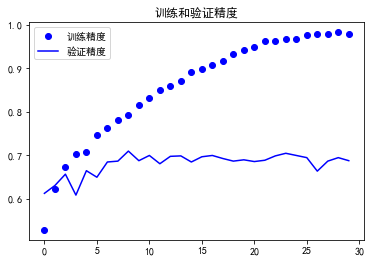

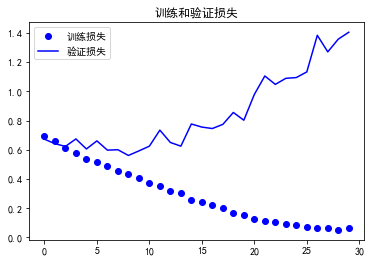

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# 绘制训练过程中的损失曲线和精度曲线
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot(epochs, acc, 'bo', label='训练精度')
plt.plot(epochs, val_acc, 'b', label='验证精度')
plt.title('训练和验证精度')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='训练损失')
plt.plot(epochs, val_loss, 'b', label='验证损失')
plt.title('训练和验证损失')
plt.legend()

plt.show()

# 使用数据增强

In [42]:
# 利用 ImageDataGenerator 来设置数据增强
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

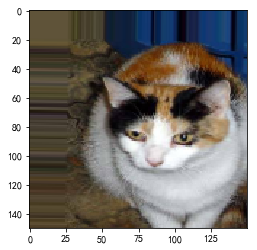

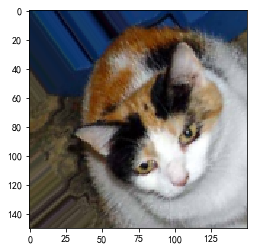

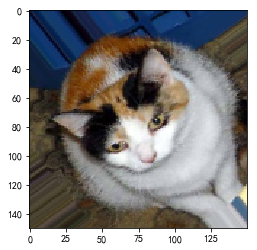

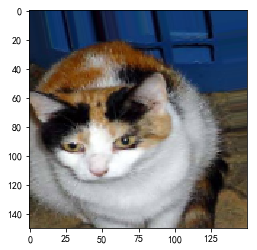

In [43]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# 随机挑选图片来查看处理效果
img_path = fnames[15]

# 读取图片并重置大小
img = image.load_img(img_path, target_size=(150, 150))

# 转化成(150, 150, 3)的Numpy数组
x = image.img_to_array(img)

# 将形状改变为(1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# 设置随机变化的终止时间
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [44]:
# 定义一个包含 dropout 的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [45]:
# 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 验证数据不做增强处理
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 127s 1s/step - loss: 0.6892 - acc: 0.5356 - val_loss: 0.6990 - val_acc: 0.5273
Epoch 2/100
100/100 [==============================] - 123s 1s/step - loss: 0.6737 - acc: 0.5800 - val_loss: 0.6674 - val_acc: 0.5786
Epoch 3/100
100/100 [==============================] - 124s 1s/step - loss: 0.6649 - acc: 0.5884 - val_loss: 0.6310 - val_acc: 0.6282
Epoch 4/100
100/100 [==============================] - 124s 1s/step - loss: 0.6506 - acc: 0.6094 - val_loss: 0.6638 - val_acc: 0.5728
Epoch 5/100
100/100 [==============================] - 124s 1s/step - loss: 0.6260 - acc: 0.6287 - val_loss: 0.6540 - val_acc: 0.5996
Epoch 6/100
100/100 [==============================] - 123s 1s/step - loss: 0.6099 - acc: 0.6600 - val_loss: 0.8946 - val_acc: 0.5135
Epoch 7/100
100/100 [==============================] - 125s 1s/step - loss: 0.6058 - acc: 0.6669 - val_loss: 0.5

100/100 [==============================] - 142s 1s/step - loss: 0.4605 - acc: 0.7781 - val_loss: 0.4460 - val_acc: 0.8009
Epoch 62/100
100/100 [==============================] - 124s 1s/step - loss: 0.4599 - acc: 0.7878 - val_loss: 0.4494 - val_acc: 0.8014
Epoch 63/100
100/100 [==============================] - 124s 1s/step - loss: 0.4587 - acc: 0.7828 - val_loss: 0.4698 - val_acc: 0.7738
Epoch 64/100
100/100 [==============================] - 125s 1s/step - loss: 0.4643 - acc: 0.7841 - val_loss: 0.4197 - val_acc: 0.8144
Epoch 65/100
100/100 [==============================] - 127s 1s/step - loss: 0.4651 - acc: 0.7850 - val_loss: 0.6129 - val_acc: 0.7234
Epoch 66/100
100/100 [==============================] - 127s 1s/step - loss: 0.4501 - acc: 0.7859 - val_loss: 0.4568 - val_acc: 0.7932
Epoch 67/100
100/100 [==============================] - 128s 1s/step - loss: 0.4449 - acc: 0.7866 - val_loss: 0.5223 - val_acc: 0.7760
Epoch 68/100
100/100 [==============================] - 125s 1s/step

In [46]:
model.save('cats_and_dogs_small_2.h5')

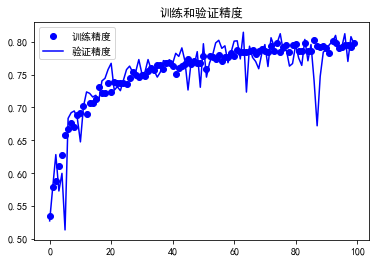

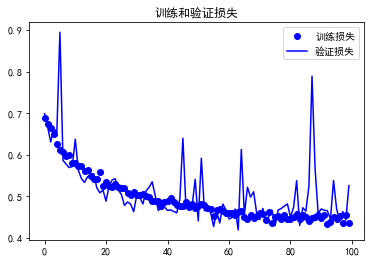

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot(epochs, acc, 'bo', label='训练精度')
plt.plot(epochs, val_acc, 'b', label='验证精度')
plt.title('训练和验证精度')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='训练损失')
plt.plot(epochs, val_loss, 'b', label='验证损失')
plt.title('训练和验证损失')
plt.legend()

plt.show()